## Algoritmo K-Nearest Neighbor para classificar cores de acordo com seu RGB
Temos uma base de dados com quatro colunas (R, G, B, label) e queremos prever a qual cor (label) determinado exemplo pertence a partir dos seus valores em R (red), G (green), B (blue).

**Importando as bibliotecas**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

**Criando um dataframe a partir da importação do dataset em .csv**

In [2]:
df = pd.read_csv('dados.csv', sep=',')

**Plotando um gráfico de barras para analisar a quantidade que cada cor aparece no dataset**

In [3]:
colors_count = df['label'].value_counts() #Fazendo a contagem de cada cor específica
unique_colors = df['label'].unique() #Listando cada cor
color_list = ['blue', 'brown', 'green', 'pink', 'yellow', 'orange', 'purple', 'red', 'grey', 'white', 'black'] #Lista para cores na plotagem

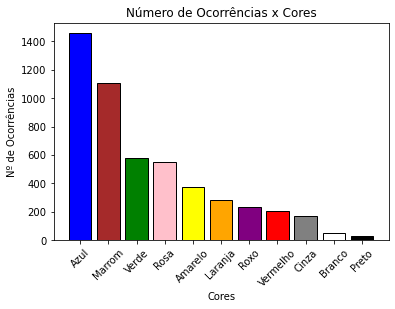

In [4]:
#Criando e mostrando o gráfico de barras
plt.bar(unique_colors, colors_count, color=color_list, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Número de Ocorrências x Cores')
plt.ylabel('Nº de Ocorrências')
plt.xlabel('Cores')
plt.show()

**Inputando valores RGB novos para serem classificados**

In [5]:
red = int(input('Digite o valor de R:\n'))
green = int(input('Digite o valor de G:\n'))
blue = int(input('Digite o valor de B:\n'))

new_color = [red, green, blue]

Digite o valor de R:
122
Digite o valor de G:
190
Digite o valor de B:
76


**Cálculo da Distância Euclidiana:**

$Data_{i,k} =
 \begin{pmatrix}
  R & G & B & Label\\
  225 & 0 & 0 & Red \\
  P_{21} & P_{22} & P_{23} & Green \\
  \vdots  & \vdots  & \vdots & \vdots \\ 
  P_{i1} & P_{i2} & P_{ik} & Blue \\
 \end{pmatrix}$
 $New_{i,j} =
 \begin{pmatrix}
  R & G & B & Label\\
  P_{j1} & P_{j2} & P_{jk} & ?
 \end{pmatrix}$

\
$Distancia Euclidiana=\sqrt {\sum_{k=1}^n (P_{ik}-P_{jk})^2} $

$n =$ Quantidade de atributos que descrevem a instâcia $P$

$k =$ Atributo que descreve a instâcia $P$ ($R=1$, $G=2$, $B=3$)

$i =$ Posição vertical da instâcia $P$ (1, 2, 3, ..., $i$)

In [6]:
total_rows = len(df)
for i in range(total_rows):
    values_sum = ((new_color[0] - df['vermelho'][i])**2) + ((new_color[1] - df['verde'][i])**2) + ((new_color[2] - df['azul'][i])**2)
    distance = math.sqrt(values_sum)
    df.loc[i,'distancia'] = distance #Criando uma nova coluna com os valores respectivos de distância.

**Setando um valor para K**

In [7]:
k_value = int(input('Selecione um valor para K (nº de vizinhos):\n'))

Selecione um valor para K (nº de vizinhos):
5


**Ordenando o dataframe e reduzindo para o tamanho de K**

In [8]:
df_knn = df.sort_values(by=['distancia'], ascending=True)
df_knn = df_knn.head(k_value)

**Buscando a cor mais recorrente dentro do dataframe**

In [9]:
knn_count = df_knn['label'].value_counts()
knn_count = dict(knn_count)
knn_color = max(knn_count, key=knn_count.get)

**Resultado do Algoritmo K-Nearest Neighbor:**

In [10]:
print(f'O esquema de cor RGB ({red}, {green}, {blue}) corresponde à cor {knn_color}')

O esquema de cor RGB (122, 190, 76) corresponde à cor Verde


**Calculando a probabilidade de ser cada cor:**

In [11]:
for key in knn_count:
    print(f'{key} -> Contagem -> {knn_count[key]} -> Probabilidade: {(knn_count[key]/k_value)*100:.2f}%')

Verde -> Contagem -> 5 -> Probabilidade: 100.00%


### Testando o algoritmo a partir do dataset já existente

**Definindo uma função para o algoritmo KNN**

In [26]:
def knn(rgb, n_neighbor):
    df = pd.read_csv('dados.csv', sep=',')
    
    total_rows = len(df)
    
    for i in range(total_rows):
        calculo_distancia = math.sqrt(
                        math.pow(rgb[0] - df['vermelho'][i], 2) +
                        math.pow(rgb[1] - df['verde'][i], 2) +
                        math.pow(rgb[2] - df['azul'][i], 2)
                        )
        
       # values_sum = ((rgb[0] - df['vermelho'][i])**2) + ((rgb[1] - df['verde'][i])**2) + ((rgb[2] - df['azul'][i])**2)
       # distance = math.sqrt(values_sum)
        df.loc[i,'distancia'] = calculo_distancia #Criando uma nova coluna com os valores respectivos de distância.
        
    df_knn = df.sort_values(by=['distancia'], ascending=True)
    df_knn = df_knn.head(n_neighbor)
    
    knn_count = df_knn['label'].value_counts()
    knn_count = dict(knn_count)
    knn_color = max(knn_count, key=knn_count.get)
    
    return knn_color

**Dividindo em conjunto de treino e conjunto de testes**

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label', 'distancia'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Aplicando a função KNN em todos os dados do conjunto de teste**

In [44]:
y_pred = []
for i in X_test.index:
    y_pred.append(knn([X_test['vermelho'][i], X_test['verde'][i], X_test['azul'][i]], 5))

In [45]:
y_pred

['Verde',
 'Azul',
 'Verde',
 'Verde',
 'Verde',
 'Verde',
 'Rosa',
 'Verde',
 'Verde',
 'Cinza',
 'Azul',
 'Roxo',
 'Marrom',
 'Cinza',
 'Azul',
 'Rosa',
 'Verde',
 'Cinza',
 'Vermelho',
 'Roxo',
 'Verde',
 'Rosa',
 'Laranja',
 'Rosa',
 'Azul',
 'Verde',
 'Marrom',
 'Azul',
 'Verde',
 'Laranja',
 'Azul',
 'Azul',
 'Marrom',
 'Verde',
 'Verde',
 'Laranja',
 'Verde',
 'Cinza',
 'Roxo',
 'Verde',
 'Roxo',
 'Verde',
 'Branco',
 'Roxo',
 'Azul',
 'Verde',
 'Azul',
 'Azul',
 'Azul',
 'Azul',
 'Azul',
 'Azul',
 'Vermelho',
 'Azul',
 'Amarelo',
 'Verde',
 'Verde',
 'Roxo',
 'Azul',
 'Vermelho',
 'Roxo',
 'Roxo',
 'Vermelho',
 'Azul',
 'Verde',
 'Azul',
 'Verde',
 'Cinza',
 'Verde',
 'Verde',
 'Rosa',
 'Verde',
 'Vermelho',
 'Azul',
 'Amarelo',
 'Amarelo',
 'Branco',
 'Verde',
 'Verde',
 'Verde',
 'Marrom',
 'Roxo',
 'Rosa',
 'Verde',
 'Roxo',
 'Azul',
 'Rosa',
 'Verde',
 'Vermelho',
 'Amarelo',
 'Rosa',
 'Rosa',
 'Verde',
 'Marrom',
 'Amarelo',
 'Amarelo',
 'Azul',
 'Vermelho',
 'Verde',
 'Ma

**Classification Report**

In [47]:
y_true = y_test.values.tolist()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Amarelo       0.92      0.82      0.87        96
        Azul       0.93      0.95      0.94       365
      Branco       0.82      1.00      0.90         9
       Cinza       0.91      0.89      0.90        57
     Laranja       0.84      0.89      0.87        55
      Marrom       0.87      0.90      0.88       124
       Preto       0.93      0.88      0.90        16
        Rosa       0.88      0.89      0.89       180
        Roxo       0.88      0.89      0.88       184
       Verde       0.95      0.95      0.95       500
    Vermelho       0.83      0.77      0.80        82

    accuracy                           0.91      1668
   macro avg       0.89      0.89      0.89      1668
weighted avg       0.91      0.91      0.91      1668



**Plotando a Matriz de Confusão**

In [49]:
from sklearn.metrics import confusion_matrix
y_labels = list(set(y_train))
cm = confusion_matrix(y_true, y_pred, labels=y_labels)

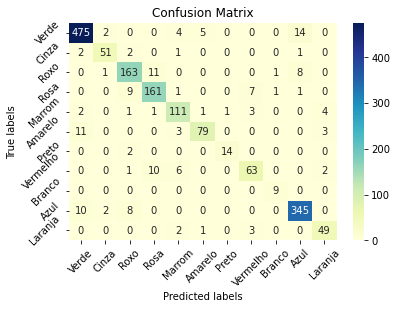

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt   

#Criando o gráfico de calor com seaborn
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='YlGnBu');  

# Configurando os labels do gráfico
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(y_labels, rotation=45); ax.yaxis.set_ticklabels(y_labels, rotation=45);